<a href="https://colab.research.google.com/github/ChoHyeonJun86/deeplearning-prac/blob/main/easy_deep_learning_principle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2장. 딥러닝 핵심 미리보기

## 나의 첫 딥러닝: '10장 폐암 수술 환자의 생존율 예측' 코드 미리보기

### 1. 환경 준비

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from keras.utils import plot_model
import numpy as np
from sklearn.model_selection import train_test_split

### 2. 데이터 준비

In [24]:
!git clone https://github.com/taehojo/data.git

Data_set = np.loadtxt("./data/ThoraricSurgery3.csv", delimiter=",")
X = Data_set[:,0:16]
y = Data_set[:,16]
train_input, test_input, train_target, test_target = train_test_split(X, y, test_size=0.2, random_state=42)

fatal: destination path 'data' already exists and is not an empty directory.


In [25]:
import pandas as pd
df = pd.read_csv('./data/ThoraricSurgery3.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1,2.88,2.16,1,0,0,0,1,1,3,0,0,0,1,0,60,0
1,2,3.40,1.88,0,0,0,0,0,0,1,0,0,0,1,0,51,0
2,2,2.76,2.08,1,0,0,0,1,0,0,0,0,0,1,0,59,0
3,2,3.68,3.04,0,0,0,0,0,0,0,0,0,0,0,0,54,0
4,2,2.44,0.96,2,0,1,0,1,1,0,0,0,0,1,0,73,1


In [26]:
df.shape

(470, 17)

### 3. 구조 결정

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 64)             │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,201 (12.50 KB)

 Trainable params: 3,201 (12.50 KB)

 Non-trainable params: 0 (0.00 B)

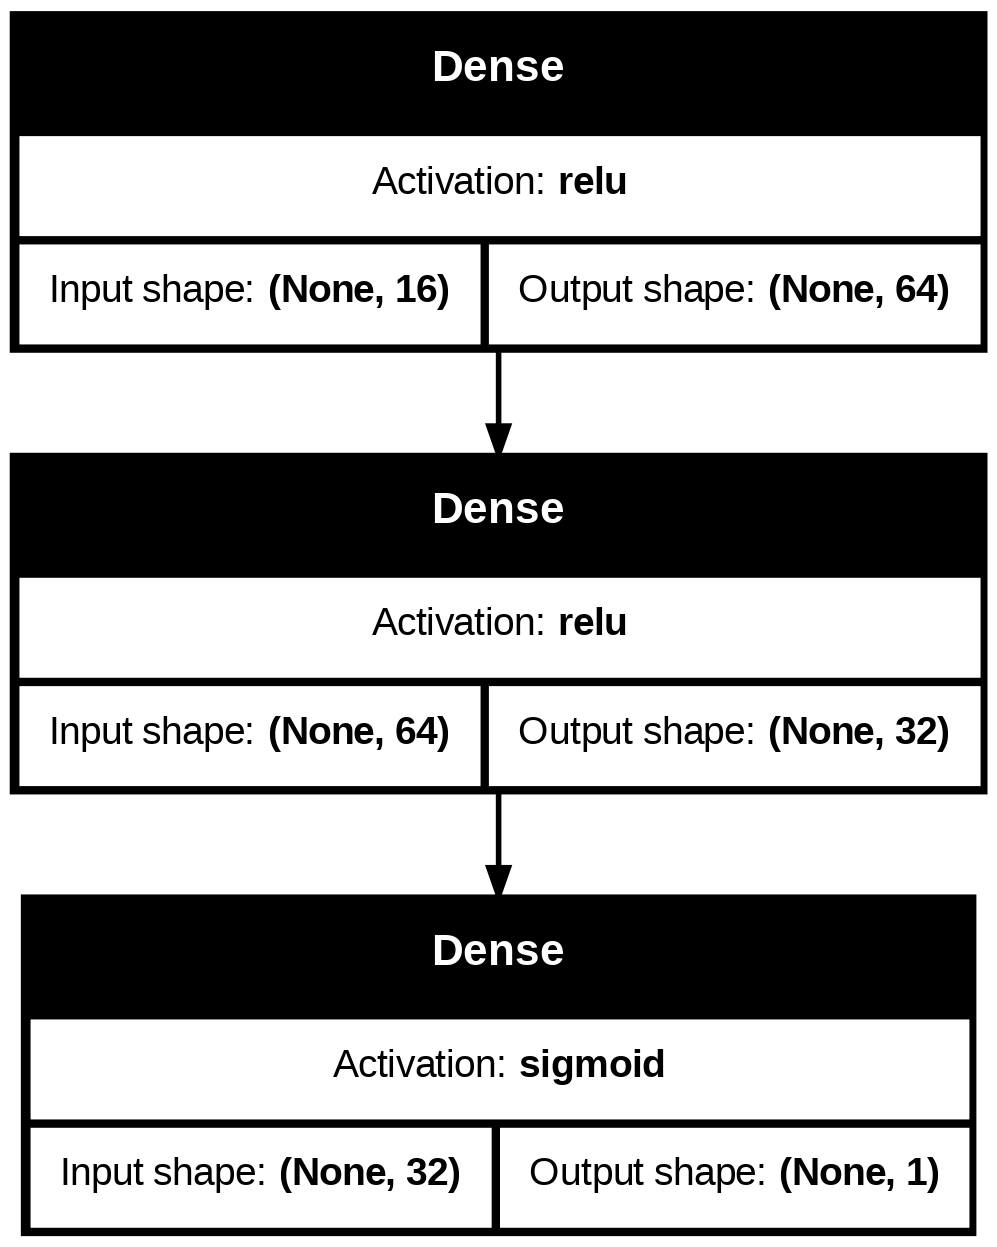

In [27]:
# model = Sequential([
#   Input(shape=(16,))
#   ,Dense(30, activation='relu')
#   ,Dense(1, activation= 'sigmoid')
# ])

model = Sequential()
model.add(Input(shape=(16,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation= 'sigmoid'))

model.summary()
plot_model(model,show_shapes=True, show_layer_activations=True)

### 4. 모델 실행

In [28]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history=model.fit(X, y, epochs=5, batch_size=16)

Epoch 1/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7231 - loss: 0.7427
Epoch 2/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8318 - loss: 0.5376
Epoch 3/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8680 - loss: 0.4029
Epoch 4/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8656 - loss: 0.4010
Epoch 5/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8539 - loss: 0.4206


In [29]:
history.history

{'accuracy': [0.7978723645210266,
  0.8510638475418091,
  0.8510638475418091,
  0.8510638475418091,
  0.8510638475418091],
 'loss': [0.6338521838188171,
  0.46298402547836304,
  0.4421730935573578,
  0.43413791060447693,
  0.4349876642227173]}

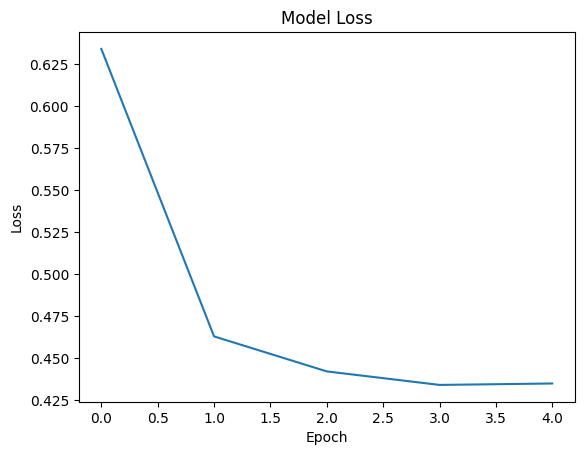

In [30]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.show()

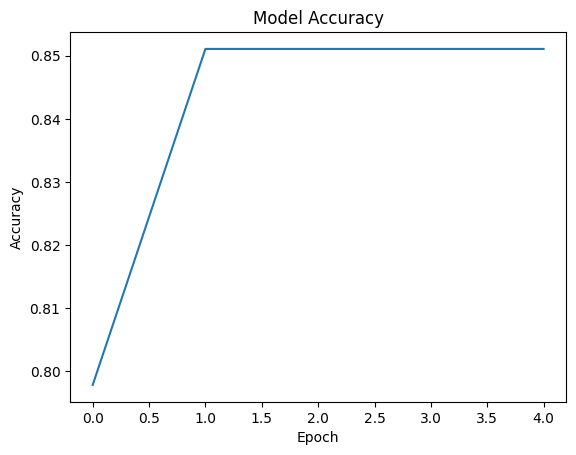

In [31]:
plt.plot(history.history['accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.show()

In [32]:
loss, accuracy = model.evaluate(train_input, train_target)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8589 - loss: 0.4756  
Test Loss: 0.4695
Test Accuracy: 0.8644


문제 1 : train, test 데이터셋을 나누는 코드를 추가하고 다시 실행해보세요
- 24번째 셀의 evaluate()의 파라미터값도 추가한 변수 중 테스트 데이터셋으로 변경

문제 2: model2라는 변수에 아래 조건을 만족하는 모델을 저장하고 학습해서 결과를 비교해보세요
- 입력층 동일
- 은닉층1 : 64개의 뉴런, 활성화함수 ReLU 사용
- 은닉층2 : 32개의 뉴런, 활성화함수 ReLU 사용
- 출력층 동일


-결과 비교, model2 에서는 이전과 다르게 epoch가 중반부에 접어들었을 때(약2.0) 손실이 늘고, 정확도가 늘어남